## 1. Import the Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

## 2. Import the Dataset

In [2]:
# Converting Date column to 'Datatime' data type, further making it index column
data = pd.read_csv('/content/AAPL.csv', parse_dates=['Date'], index_col='Date')
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300


# **EDA-Exploratory Data Analysis**

In [3]:
# Display the first few rows of the dataset
print(data.head())

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200
2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500
2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400
2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200
2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100


In [4]:
#No.of rows & columns
data.shape

(2011, 6)

In [5]:
#Checking for null values and data type of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2011 entries, 2012-01-03 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2011 non-null   float64
 1   High       2011 non-null   float64
 2   Low        2011 non-null   float64
 3   Close      2011 non-null   float64
 4   Adj Close  2011 non-null   float64
 5   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.0 KB


In [6]:
# checking for the duplicate values
data.duplicated().sum()

0

In [7]:
# Describing the dataset
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [8]:
# Check for missing values
print("\nMissing values in each column:\n", data.isnull().sum())


Missing values in each column:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [9]:
#CustomBusinessDay - shows the working days excluding holidays
#USFederalHolidayCalendar - return working days holidays
us_cal = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [10]:
# idx1 = pd.Index([2, 1, 3, 4])
# idx2 = pd.Index([3, 4, 5, 6])
# idx1.difference(idx2)
# >>Int64Index([1, 2], dtype='int64')
# idx1.difference(idx2, sort=False)
# >>Int64Index([2, 1], dtype='int64')

my_range = pd.date_range(start='2012-01-03',end='2019-12-30',freq=us_cal)
print(my_range.difference(data.index))

DatetimeIndex(['2012-04-06', '2012-10-29', '2012-10-30', '2013-03-29',
               '2014-04-18', '2015-04-03', '2016-03-25', '2017-04-14',
               '2018-03-30', '2018-12-05', '2019-04-19'],
              dtype='datetime64[ns]', freq=None)


In [11]:
# deleting extra's dates from 'my range' which are not in actuall dataset 'data'
Cu = CustomBusinessDay(calendar=USFederalHolidayCalendar(),holidays=['2012-04-06', '2012-10-29', '2012-10-30',
                                                                    '2013-03-29','2014-04-18', '2015-04-03',
                                                                    '2016-03-25', '2017-04-14', '2018-03-30',
                                                                    '2018-12-05', '2019-04-19'])
my_range = pd.date_range(start='2012-01-03',end='2019-12-30',freq=Cu)
print(my_range.difference(data.index))

DatetimeIndex([], dtype='datetime64[ns]', freq='C')


In [12]:
#16 values that are going to be ignored
print(data.index.difference(my_range))

DatetimeIndex(['2012-10-08', '2012-11-12', '2013-10-14', '2013-11-11',
               '2014-10-13', '2014-11-11', '2015-10-12', '2015-11-11',
               '2016-10-10', '2016-11-11', '2017-10-09', '2017-11-10',
               '2018-10-08', '2018-11-12', '2019-10-14', '2019-11-11'],
              dtype='datetime64[ns]', freq=None)


In [13]:
#setting dataset frequency 'CustomBusinessDay'(in above cell)
df = data.asfreq(Cu)
df.shape

(1995, 6)

In [14]:
#dropping Unnecessary columns
df.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)
df.head()

,Adj Close
Date,
2012-01-03,50.765709
2012-01-04,51.038536
2012-01-05,51.605175
2012-01-06,52.144630
2012-01-09,52.061932


In [15]:
#Storing the dataset
df.to_csv('new_Apple_data.csv',index = True)

In [16]:
# make columns of weeks,month and Years
df['Year-Week'] =df.index.strftime('%Y-%U')
df['Month'] = df.index.strftime('%Y-%m')
df['Year'] = df.index.strftime('%Y')
df["month"] =df.index.strftime("%b")
df['Qtr'] = pd.to_datetime(df['Month'].values, format='%Y-%m').astype('period[Q]')

In [17]:
df.Year.value_counts()

,count
Year,
2013,250
2014,250
2015,250
2016,250
2017,249
2018,249
2019,249
2012,248


## 3. Visualization

Text(0, 0.5, 'Adj Close')

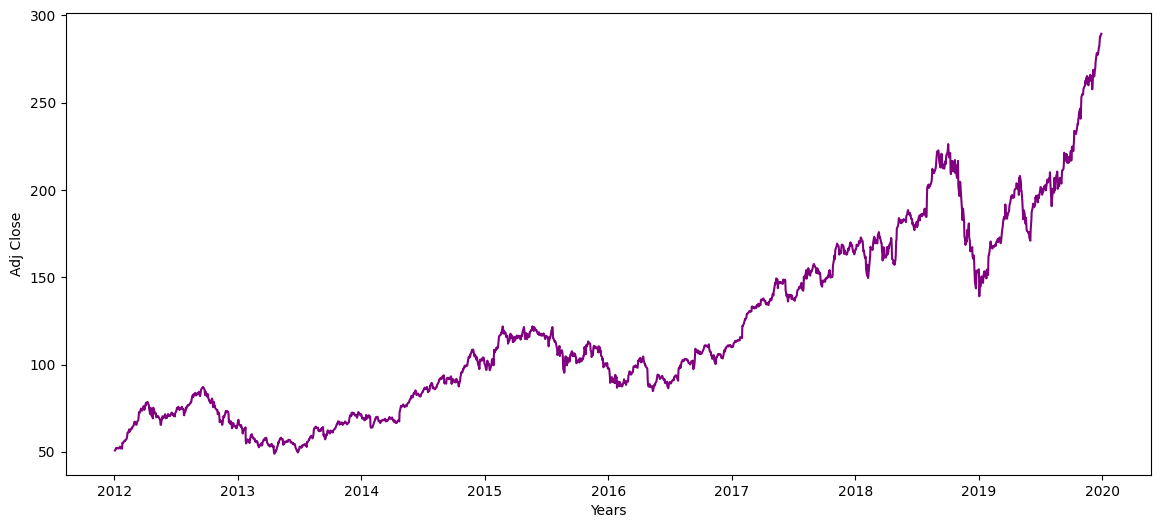

In [18]:
# Yearly chart
fig,ax=plt.subplots(figsize=(14,6))
plt.plot(df['Adj Close'],color = 'purple')
plt.xlabel('Years')
plt.ylabel('Adj Close')

<Axes: xlabel='Adj Close', ylabel='Density'>

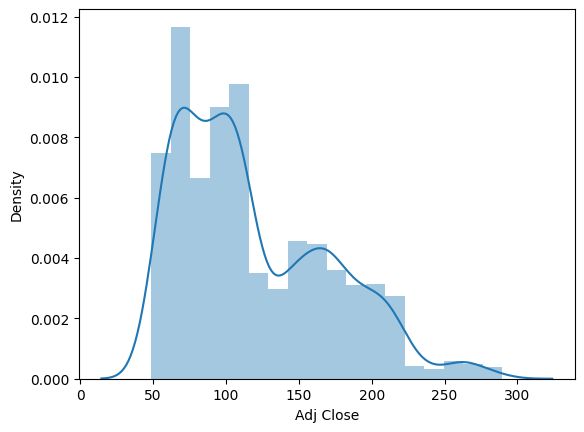

In [19]:
sns.distplot(df['Adj Close'],kde=True)

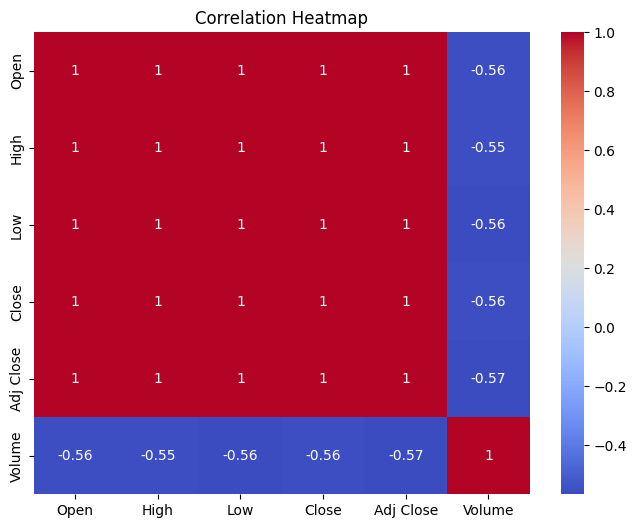

In [20]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1000x600 with 0 Axes>

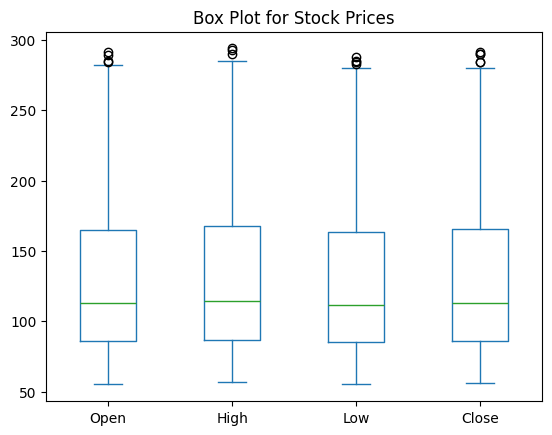

In [21]:
# Distribution plots for Open, High, Low, Close prices
plt.figure(figsize=(10, 6))
data[['Open', 'High', 'Low', 'Close']].plot(kind='box')
plt.title('Box Plot for Stock Prices')
plt.show()

## 4.Time Series Component

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

Text(0.5, 0.98, 'Adj Close decomposition')

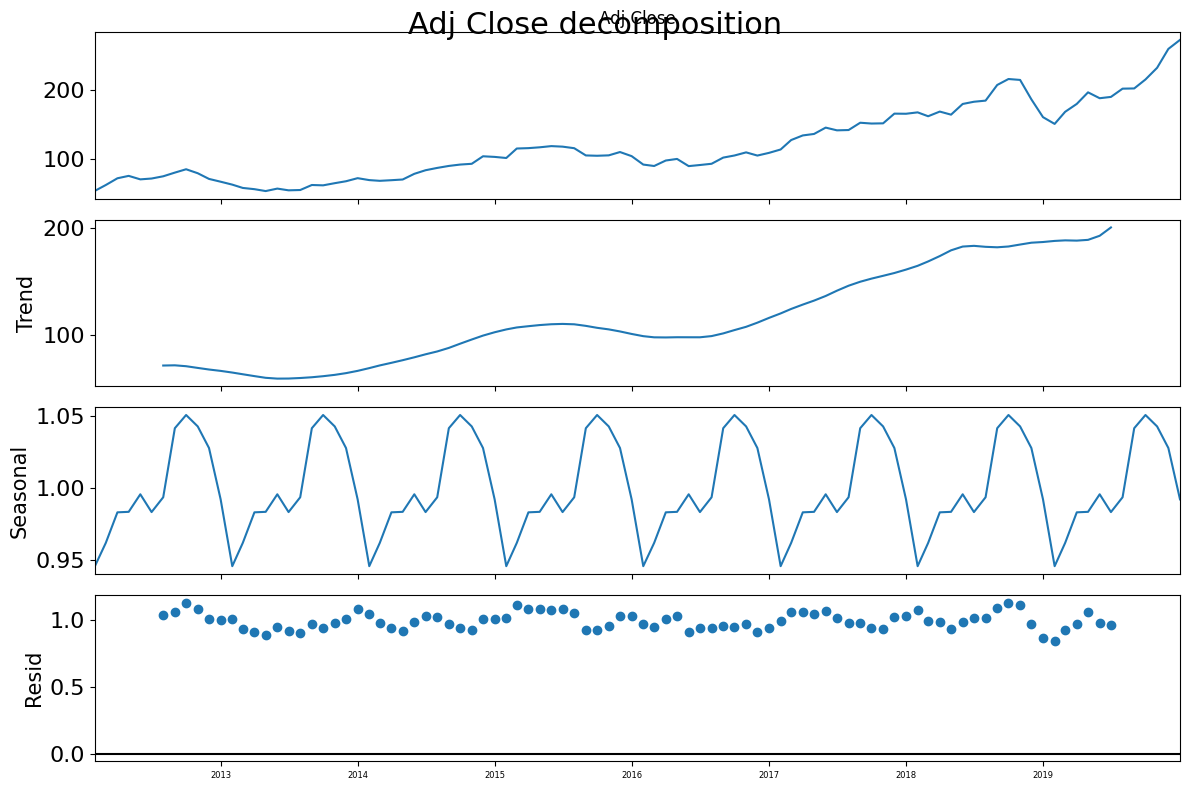

In [23]:
# Aggregating the Time Series to a monthly scaled index
# y = df[['Date','Adj Close']].copy()
# y.set_index('Date', inplace=True)
# y.index = pd.to_datetime(y.index)
y = df['Adj Close'].resample('1M').mean()

# Setting rcparams
rcParams['figure.figsize'] = 12, 8
rcParams['axes.labelsize'] = 15
rcParams['ytick.labelsize'] = 16
rcParams['xtick.labelsize'] = 6

# Using statistical tools of statsmodel library
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
decomp = decomposition.plot()
decomp.suptitle('Adj Close decomposition', fontsize=22)

From the above plot we can see that, the trend component is upward trend that means that closeing price is maximum in every year.

We can see that the seasonal component changes slowly over time & we can see there is repeating patterns so we can say that seasonality is present on our data.


### 4.1 Seasonal Subseries Plot

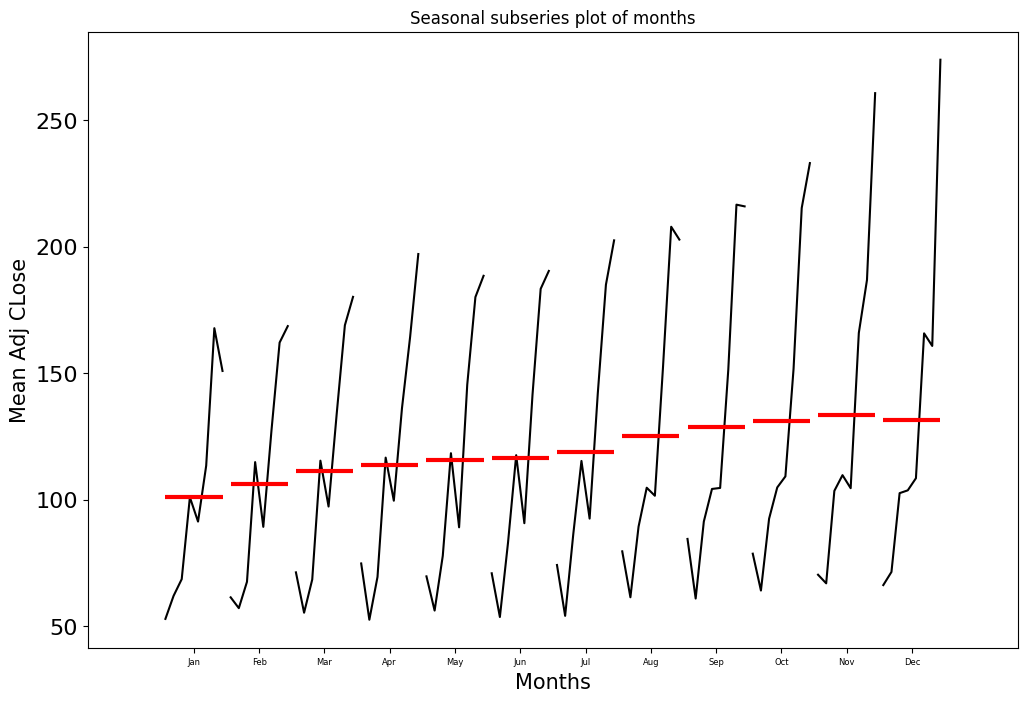

In [24]:
from statsmodels.graphics.tsaplots import quarter_plot,month_plot
month_plot(df['Adj Close'].resample('1M').mean())
plt.title('Seasonal subseries plot of months')
plt.xlabel('Months')
plt.ylabel('Mean Adj CLose')
plt.show()

In above Monthly chart we can see that there is no Monthly Seasonality

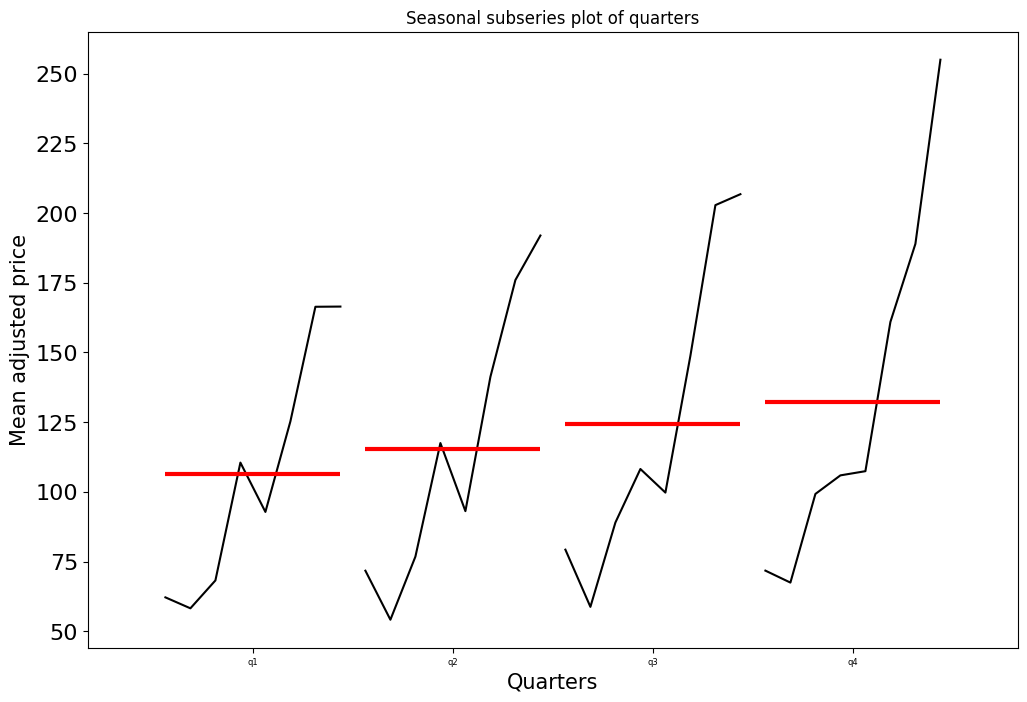

In [25]:
quarter_plot(df['Adj Close'].resample('Q').mean())
plt.title('Seasonal subseries plot of quarters')
plt.xlabel('Quarters')
plt.ylabel('Mean adjusted price')
plt.show()

Here we can se that Data has Quarterly Seasonality

## 5. Testing For Stationarity

In [26]:
from statsmodels.tsa.stattools import adfuller

In [27]:
# test_result=adfuller(df['Adj Close'])
# test_result

In [28]:
def adf_test(series, title=''):

    # .dropna() handles differenced data
    result = adfuller(series.dropna(),autolag='AIC')

    print('Agumented Dicky-Fuller test')
    labels = ['ADF test statistic :','p-value :','No. of Lags :']
    out = pd.Series(result[0:3],index=labels)

    for key,val in result[4].items():
        out['critical value ({}) :'.format(key)]=val

    # .to_string() removes the line "dtype: float64"
    print(out.to_string())

    if result[1] <= 0.05:
        print("\nReject the null hypothesis")
        print("Data is stationary")
    else:
        print("\nFail to reject the null hypothesis")
        print("Data is non-stationary")

In [29]:
adf_test(df['Adj Close'],title='')

Agumented Dicky-Fuller test
ADF test statistic :       1.252371
p-value :                  0.996328
No. of Lags :             17.000000
critical value (1%) :     -3.433662
critical value (5%) :     -2.863003
critical value (10%) :    -2.567549

Fail to reject the null hypothesis
Data is non-stationary


The test statistic is more than the critical values.
The p value is greater than 0.05,
 that's why we failed to reject null hypothesis

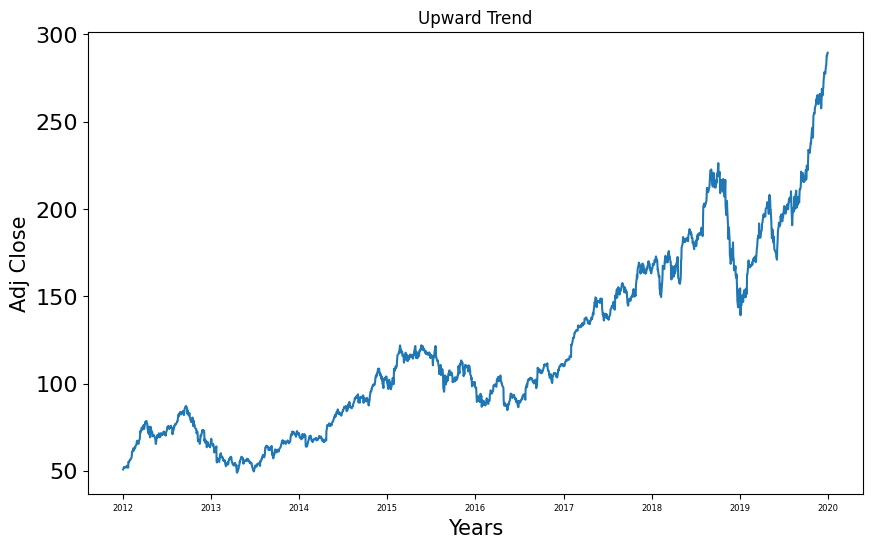

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(df['Adj Close'])
plt.xlabel('Years')
plt.ylabel('Adj Close')
plt.title('Upward Trend')
plt.show()

In [31]:
# Differencing y(t)=y(t)-y(t-1)
df[' Adj Close First Difference'] = df['Adj Close'] -df['Adj Close'].shift(1)

In [32]:
# After differencing ADF test
adf_test(df[' Adj Close First Difference'].dropna())

Agumented Dicky-Fuller test
ADF test statistic :     -9.097047e+00
p-value :                 3.690851e-15
No. of Lags :             1.600000e+01
critical value (1%) :    -3.433662e+00
critical value (5%) :    -2.863003e+00
critical value (10%) :   -2.567549e+00

Reject the null hypothesis
Data is stationary


The test statistic is less than the critical values.
The p value is less than 0.05,
 that's why we can reject null hypothesis

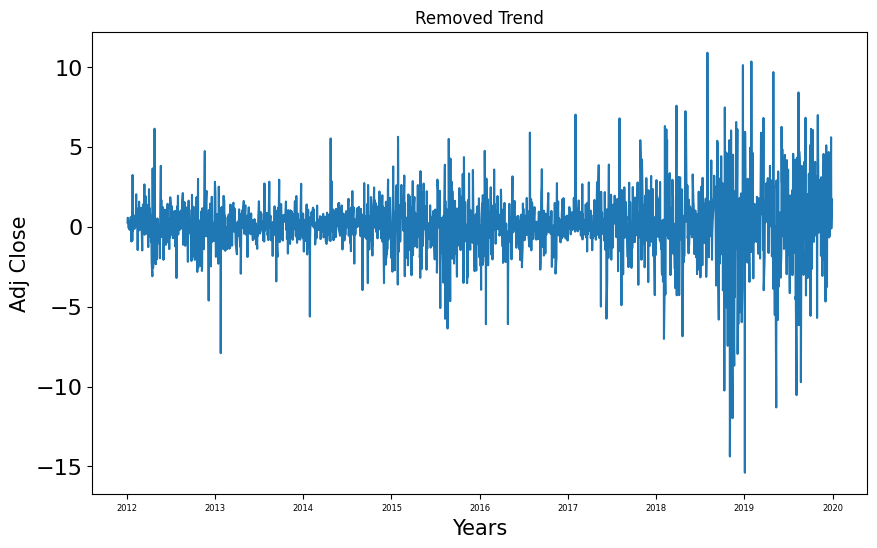

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(df[' Adj Close First Difference'])
plt.xlabel('Years')
plt.ylabel('Adj Close')
plt.title('Removed Trend')
plt.show()

After First Differencing Trend has been removed

In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

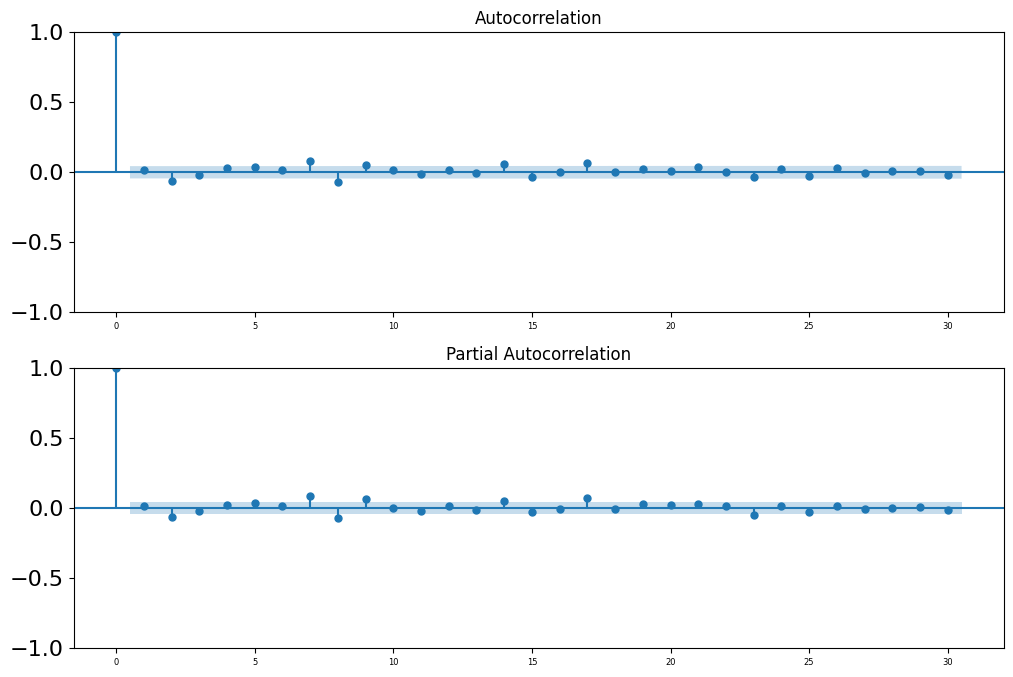

In [35]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df[' Adj Close First Difference'].iloc[2:],lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df[' Adj Close First Difference'].iloc[2:],lags=30,ax=ax2)

From the above plot we can see that,the ACF & PACF plot start with a lag zero(0) which is the correlation of the time series with itself & therefore results in correlation of 1 .

You can see that a blue area in the ACF & PACF plots indicate the 95% confidence interval & Is an indicator of the significant threshold.

From the plot we choose p=1 & q=1

## 6. Train/Test Split

In [36]:
# Split data into train and test
df_train=df.iloc[:1760]
df_test=df.iloc[1760:]

## 7. Model Building

### 7.1 ARIMA Model

In [37]:
from statsmodels.tsa.arima_model import ARIMA

In [38]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [39]:
model = sm.tsa.arima.ARIMA(df_train['Adj Close'], order=(1,1,1))
model_fit = model.fit()

In [40]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 1760
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3586.498
Date:                Wed, 29 Jan 2025   AIC                           7178.995
Time:                        11:04:28   BIC                           7195.413
Sample:                    01-03-2012   HQIC                          7185.063
                         - 01-22-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8404      0.104     -8.119      0.000      -1.043      -0.638
ma.L1          0.8682      0.097      8.939      0.000       0.678       1.059
sigma2         3.4556      0.051     68.164      0.000       3.356       3.555
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6558.14
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               4.56   Skew:                            -0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

From the above analysis, we can see that the P-value of ar.L1 model & ma.L1 model is 0.00 which is less than 0.05, that mean's our data has highly significant

<Axes: xlabel='Date'>

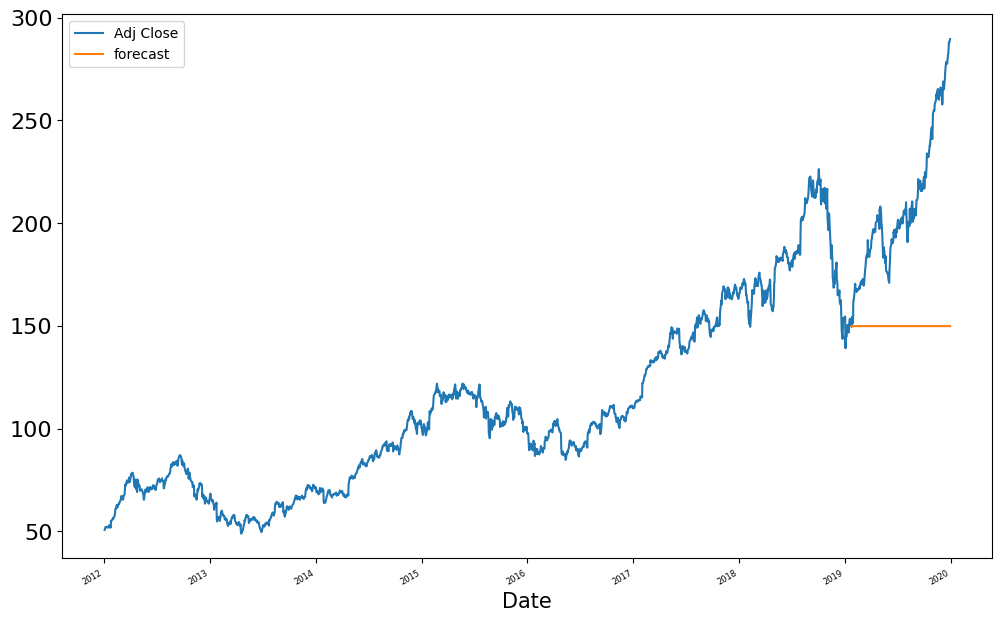

In [41]:
df['forecast']=model_fit.predict(start=1760,end=1994)

df[['Adj Close','forecast']].plot(figsize=(12,8))

In [42]:
df[['Adj Close','forecast']].iloc[1760:]

,Adj Close,forecast
Date,,
2019-01-23,150.602600,149.787781
2019-01-24,149.408875,149.962731
2019-01-25,154.359848,149.815703
2019-01-28,152.931305,149.939266
2019-01-29,151.346207,149.835424
...,...,...
2019-12-23,282.054138,149.882842
2019-12-24,282.322266,149.882842
2019-12-26,287.923645,149.882842


In [43]:
#Mean Absolute Percentage Error (MAPE) - ARIMA
mape1 = np.mean(np.abs(df['forecast'] - df['Adj Close'])/np.abs(df['Adj Close']))
mape1

0.26374136694427547

In [44]:
#Root Mean Squared Error (RMSE) - ARIMA
rmse1 = np.mean((df['forecast'] - df['Adj Close'])**2)**.5
rmse1

66.82204804441712

### 7.2 SARIMA Model(Monthly)

In [45]:
model1=sm.tsa.statespace.SARIMAX(df_train['Adj Close'], order=(1,1,1),seasonal_order=(1,1,1,30))
model1_fit=model1.fit()

In [46]:
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Adj Close   No. Observations:                 1760
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -3591.005
Date:                            Wed, 29 Jan 2025   AIC                           7192.011
Time:                                    11:04:55   BIC                           7219.287
Sample:                                01-03-2012   HQIC                          7202.100
                                     - 01-22-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3737     67.000      0.006      0.996    -130.943     131.691
ma.L1         -0.3738     66.995     -0.006      0.996    -131.682     130.935
ar.S.L30      -0.0657      0.020     -3.273      0.001      -0.105      -0.026
ma.S.L30      -0.9649      0.013    -76.081      0.000      -0.990      -0.940
sigma2         3.5524      0.058     61.260      0.000       3.439       3.666
===================================================================================
Ljung-Box (L1) (Q):                   0.98   Jarque-Bera (JB):              5925.04
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               4.66   Skew:                            -0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

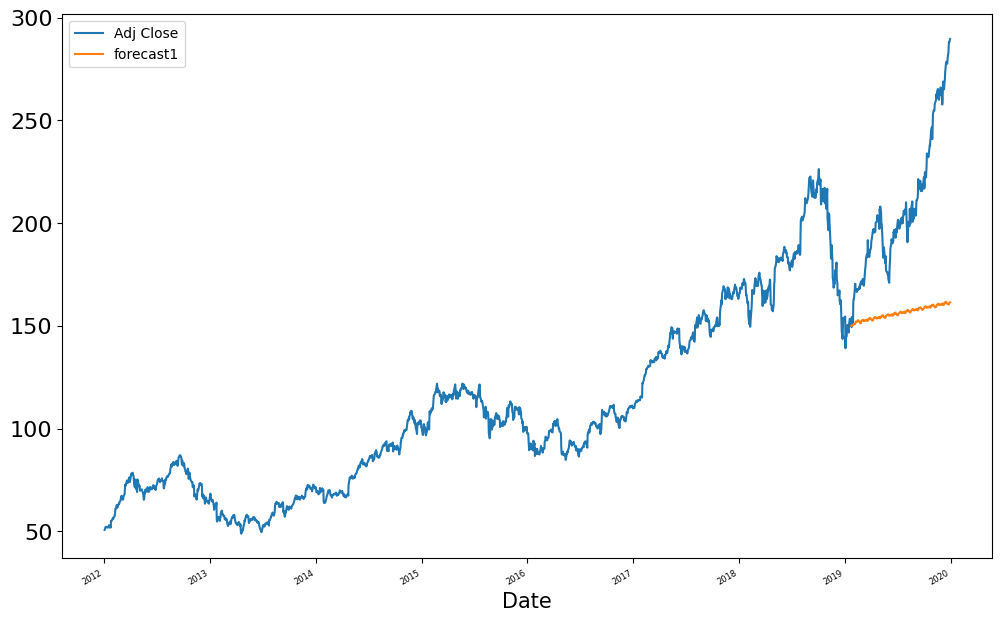

In [47]:
df['forecast1']=model1_fit.predict(start=1760,end=1994,dynamic=True,exog=None)
df[['Adj Close','forecast1']].plot(figsize=(12,8))

In [48]:
df0 = df[['Adj Close','forecast1']].iloc[1760:]


In [49]:
#Mean Absolute Percentage Error (MAPE) - ARIMA
mape2 = np.mean(np.abs(df0['forecast1'] - df0['Adj Close'])/np.abs(df0['Adj Close']))
mape2

0.23450232773344376

In [50]:
#Root Mean Squared Error (RMSE) - ARIMA
rmse2 = np.mean((df0['forecast1'] - df0['Adj Close'])**2)**.5
rmse2

59.951663644121204

### 7.3 SARIMA Model(Quaterly)

In [51]:
model2=sm.tsa.statespace.SARIMAX(df_train['Adj Close'], order=(1,1,1),seasonal_order=(1,1,1,63))
model2_fit=model2.fit()

In [52]:
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Adj Close   No. Observations:                 1760
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 63)   Log Likelihood               -3551.859
Date:                            Wed, 29 Jan 2025   AIC                           7113.718
Time:                                    11:07:36   BIC                           7140.898
Sample:                                01-03-2012   HQIC                          7123.781
                                     - 01-22-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9496      0.038    -25.006      0.000      -1.024      -0.875
ma.L1          0.9643      0.033     29.421      0.000       0.900       1.029
ar.S.L63      -0.0531      0.029     -1.848      0.065      -0.109       0.003
ma.S.L63      -0.8688      0.019    -45.077      0.000      -0.907      -0.831
sigma2         3.6510      0.056     65.111      0.000       3.541       3.761
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):              5674.61
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               4.70   Skew:                            -0.82
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

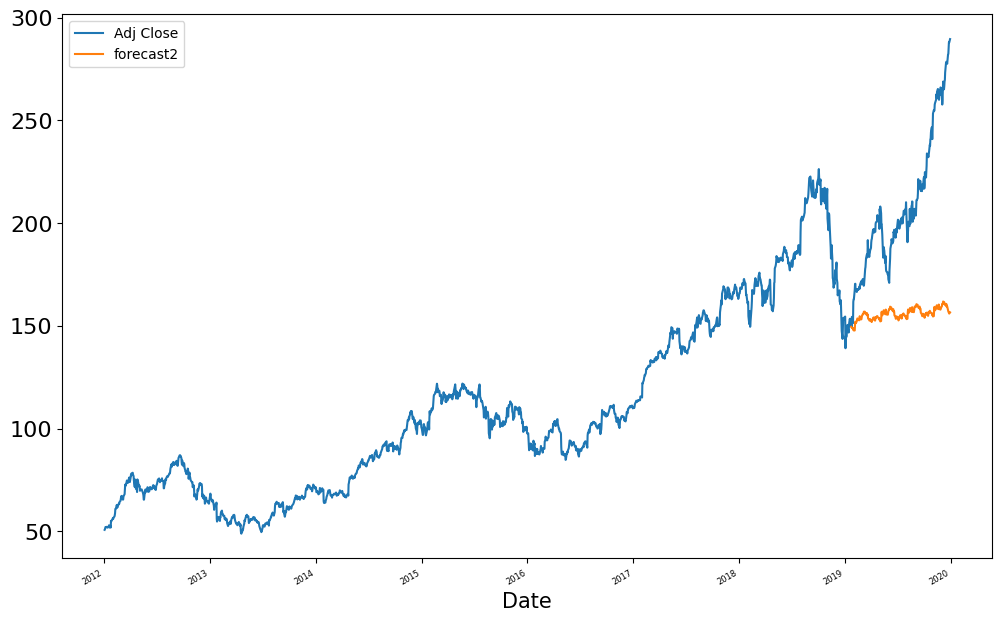

In [53]:
df['forecast2']=model2_fit.predict(start=1760,end=1994,dynamic=True,exog=None)
df[['Adj Close','forecast2']].plot(figsize=(12,8))

In [54]:
df1 = df[['Adj Close','forecast1','forecast2']].iloc[1760:]
df1

,Adj Close,forecast1,forecast2
Date,,,
2019-01-23,150.602600,150.043222,149.563206
2019-01-24,149.408875,149.936628,149.338771
2019-01-25,154.359848,150.190058,149.024368
2019-01-28,152.931305,150.199139,148.984240
2019-01-29,151.346207,150.372424,148.311939
...,...,...,...
2019-12-23,282.054138,160.716119,157.696456
2019-12-24,282.322266,160.369471,157.022072
2019-12-26,287.923645,160.500600,156.377370


In [55]:
#Mean Absolute Percentage Error (MAPE) - ARIMA
mape3 = np.mean(np.abs(df1['forecast2'] - df1['Adj Close'])/np.abs(df1['Adj Close']))
mape3

0.23557767380139308

In [56]:
rmse3 = np.mean((df1['forecast2'] - df1['Adj Close'])**2)**.5
rmse3

60.82207398637723

In [57]:
data1 = {'Models':['ARIMA','SARIMA(Monthly)',
                   'SARIMA(Qauterly)',
                   ],
       'Root Mean Squared Error':[rmse1,rmse2,rmse3]}
Model = pd.DataFrame(data1)
Model = Model.sort_values('Root Mean Squared Error').reset_index(drop=True)
Model

,Models,Root Mean Squared Error
0,SARIMA(Monthly),59.951664
1,SARIMA(Qauterly),60.822074
2,ARIMA,66.822048


SARIMA monthly model has better RMSE score comparison to other

### 7.4 Selected SARIMA Model

In [58]:
#Training Model with all data
model3=sm.tsa.statespace.SARIMAX(df['Adj Close'], order=(1,1,1),seasonal_order=(1,1,1,30))
model3_fit=model3.fit()

In [59]:
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Adj Close   No. Observations:                 1995
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -4255.959
Date:                            Wed, 29 Jan 2025   AIC                           8521.918
Time:                                    11:08:24   BIC                           8549.831
Sample:                                01-03-2012   HQIC                          8532.176
                                     - 12-30-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5277      1.127      0.468      0.640      -1.681       2.736
ma.L1         -0.5367      1.120     -0.479      0.632      -2.733       1.659
ar.S.L30      -0.0205      0.020     -1.021      0.307      -0.060       0.019
ma.S.L30      -0.9724      0.011    -88.589      0.000      -0.994      -0.951
sigma2         4.2692      0.069     61.433      0.000       4.133       4.405
===================================================================================
Ljung-Box (L1) (Q):                   1.15   Jarque-Bera (JB):              4203.12
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):               6.38   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Forcasting 30 Days Price

In [60]:
f = pd.DataFrame(model3_fit.forecast(30))
f

,predicted_mean
2019-12-31,289.449403
2020-01-02,289.762916
2020-01-03,290.064705
2020-01-06,289.945387
2020-01-07,289.743528
2020-01-08,289.412753
2020-01-09,289.689815
2020-01-10,290.542149
2020-01-13,290.533178
2020-01-14,290.802670


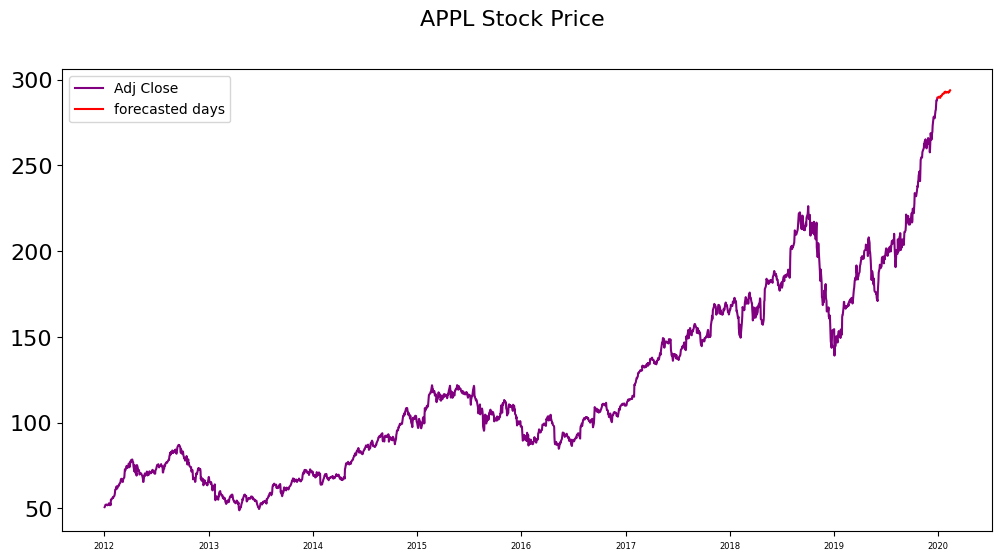

In [61]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(df['Adj Close'],label='Adj Close',color='purple')
ax.plot(f,label='forecasted days',color='red')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('APPL Stock Price', fontsize=16)
plt.show()

# 8. Pickle File

Saving best Perform

In [66]:
import pickle
from pickle import load

In [67]:
# Save model to pickle file
with open('sarima_model.pkl', 'wb') as f: # Changed 'sarima_modelkl'.p to 'sarima_modelkl.p'
    pickle.dump(model3_fit, f) # Changed sarima_model to model3_fit based on Global variables. Make sure you have the right model if not

print("SARIMA model saved successfully!")

SARIMA model saved successfully!


In [69]:
loaded_model = load(open('sarima_model.pkl', 'rb')) # Changed file name to 'sarima_model.pkl' and mode to 'rb'
fct = pd.DataFrame(loaded_model.forecast(30))
fct

,predicted_mean
2019-12-31,289.449403
2020-01-02,289.762916
2020-01-03,290.064705
2020-01-06,289.945387
2020-01-07,289.743528
2020-01-08,289.412753
2020-01-09,289.689815
2020-01-10,290.542149
2020-01-13,290.533178
2020-01-14,290.802670
